<a href="https://colab.research.google.com/github/ms-eea/forecasting_and_prediction_modeling/blob/main/Predicting_the_Future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a predictive model using the data from "/content/Weather data.csv".

## Load the data

### Subtask:
Load the "Weather data.csv" file into a pandas DataFrame.


**Reasoning**:
The first step is to import the pandas library and load the data from the specified CSV file into a DataFrame.



In [ ]:
import pandas as pd

weather_df = pd.read_csv('/content/Weather data.csv')

## Explore the data

### Subtask:
Display the first few rows, check for missing values, and examine the data types.


**Reasoning**:
Display the first few rows, check for missing values, and examine the data types as requested in the instructions.



In [ ]:
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y"
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0..."
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101..."
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105..."
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106..."
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107..."


,0
"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y  94824 non-null  object
dtypes: object(1)
memory usage: 740.9+ KB


**Reasoning**:
The data was not loaded correctly due to a formatting issue in the CSV. The header and data are in a single column. Need to read the CSV with a different separator.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', sep=',')
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y"
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0..."
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101..."
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105..."
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106..."
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107..."


,0
"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y  94824 non-null  object
dtypes: object(1)
memory usage: 740.9+ KB


**Reasoning**:
The previous attempt to read the CSV with a comma separator failed. It seems like the separator might be something else, or there's an issue with how the data is structured. Given the output, it looks like the columns are still being treated as a single string. I will try reading the file again, but this time specifying a different separator, which appears to be a mix of commas and other characters based on the header format. I will try specifying multiple possible separators. If that doesn't work, I will try to read the data line by line to figure out the correct separator.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', sep='[,;\t]')
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

/tmp/ipython-input-1976618629.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  weather_df = pd.read_csv('/content/Weather data.csv', sep='[,;\t]')


ValueError: substring not found

**Reasoning**:
The previous attempts to read the CSV with various separators failed. The error message "ValueError: substring not found" suggests an issue with quoting or parsing the first line. Given that the file is still being read as a single column, I will try reading the file line by line to inspect the actual format and determine the correct separator or parsing method.



In [ ]:
with open('/content/Weather data.csv', 'r') as f:
    for i in range(10):
        print(f.readline())

﻿"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y"

"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0,0,0,-1,10079,18.0,8.0,98,81.0,7,1.0,1.0,0.0,0.0,0.0"

"2012-01-01 01:00:00,240,230,60,70,100,106,,101,0,0,0,-1,10077,47.0,7.0,97,51.0,7,0.0,1.0,0.0,0.0,0.0"

"2012-01-01 02:00:00,240,230,70,80,100,111,,105,0,0,0,-1,10075,60.0,8.0,96,51.0,7,0.0,1.0,0.0,0.0,0.0"

"2012-01-01 03:00:00,240,240,90,90,130,109,,106,0,0,4,2,10073,34.0,8.0,98,53.0,7,0.0,1.0,0.0,0.0,0.0"

"2012-01-01 04:00:00,240,240,90,90,130,112,,107,0,0,4,2,10070,65.0,8.0,97,81.0,7,0.0,1.0,0.0,0.0,0.0"

"2012-01-01 05:00:00,240,240,90,90,120,115,98.0,107,0,0,0,-1,10073,65.0,8.0,95,23.0,7,0.0,1.0,0.0,0.0,0.0"

"2012-01-01 06:00:00,240,240,90,90,130,112,,106,0,0,0,0,10077,65.0,8.0,96,,5,0.0,0.0,0.0,0.0,0.0"

"2012-01-01 07:00:00,240,230,90,80,130,109,,104,0,0,0,0,10084,65.0,8.0,97,,5,0.0,0.0,0.0,0.0,0.0"

"2012-01-01 08:00:00,240,230,80,80,120,112,,103,0,8,0,0,10082,65.0,6.0,94,,5,0.0,0.0,0.0,0.0,0.0"



**Reasoning**:
The output from reading the first few lines reveals that the data is enclosed in double quotes and the actual separator is a comma. There's also a BOM character at the beginning. I need to read the CSV with `sep=','`, `quotechar='"`, and potentially handle the BOM character.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', sep=',', quotechar='"')
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y"
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0..."
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101..."
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105..."
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106..."
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107..."


,0
"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y  94824 non-null  object
dtypes: object(1)
memory usage: 740.9+ KB


**Reasoning**:
The previous attempts to read the CSV with various separators and quote characters failed, and the data is still being read as a single column. This indicates that the issue might be with the file encoding or a hidden character causing the parsing to fail. I will try reading the file again, explicitly specifying the encoding as 'utf-8-sig' to handle the BOM character, which was observed in the output of reading lines.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', encoding='utf-8-sig')
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y"
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0..."
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101..."
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105..."
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106..."
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107..."


,0
"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y  94824 non-null  object
dtypes: object(1)
memory usage: 740.9+ KB


## Explore the data

### Subtask:
Explore the data (Retry)


**Reasoning**:
Based on the previous attempts, the CSV file might have a different separator or encoding that is not being recognized by `pd.read_csv`. I will try reading the file again, this time specifying the separator and quoting behavior, and explicitly define the column names and data types based on the structure observed in the manual inspection. After loading, I will display the head, check for missing values, and show the data types.



In [ ]:
column_names = ['YYYYMMDD_H', 'STN', 'DD', 'FH', 'FF', 'FX', 'T', 'T10N', 'TD', 'SQ', 'Q', 'DR', 'RH', 'P', 'VV', 'N', 'U', 'WW', 'IX', 'M', 'R', 'S', 'O', 'Y']
dtype = {col: 'object' for col in column_names}
weather_df = pd.read_csv('/content/Weather data.csv', sep=',', quotechar='"', names=column_names, dtype=dtype)

display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,VV,N,U,WW,IX,M,R,S,O,Y
0,"YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,R...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2012-01-01 01:00:00,240,230,60,70,100,106,,101...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2012-01-01 02:00:00,240,230,70,80,100,111,,105...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2012-01-01 03:00:00,240,240,90,90,130,109,,106...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
YYYYMMDD_H,0
STN,94825
DD,94825
FH,94825
FF,94825
FX,94825
T,94825
T10N,94825
TD,94825
SQ,94825


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94825 entries, 0 to 94824
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YYYYMMDD_H  94825 non-null  object
 1   STN         0 non-null      object
 2   DD          0 non-null      object
 3   FH          0 non-null      object
 4   FF          0 non-null      object
 5   FX          0 non-null      object
 6   T           0 non-null      object
 7   T10N        0 non-null      object
 8   TD          0 non-null      object
 9   SQ          0 non-null      object
 10  Q           0 non-null      object
 11  DR          0 non-null      object
 12  RH          0 non-null      object
 13  P           0 non-null      object
 14  VV          0 non-null      object
 15  N           0 non-null      object
 16  U           0 non-null      object
 17  WW          0 non-null      object
 18  IX          0 non-null      object
 19  M           0 non-null      object
 20  R     

**Reasoning**:
The previous attempt to load the data with specified column names and data types still resulted in most columns being empty, except for the first column which contains the entire row data as a string. This indicates that the separator and quote character are still not being correctly interpreted. I will try reading the file again, but this time I will skip the first row, as it seems to be a header row that is being incorrectly parsed as data. I will also keep the `sep` and `quotechar` parameters as they were the most likely candidates for correct parsing based on manual inspection.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', sep=',', quotechar='"', skiprows=[0], names=column_names, dtype=dtype)

display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,VV,N,U,WW,IX,M,R,S,O,Y
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
YYYYMMDD_H,0
STN,94824
DD,94824
FH,94824
FF,94824
FX,94824
T,94824
T10N,94824
TD,94824
SQ,94824


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YYYYMMDD_H  94824 non-null  object
 1   STN         0 non-null      object
 2   DD          0 non-null      object
 3   FH          0 non-null      object
 4   FF          0 non-null      object
 5   FX          0 non-null      object
 6   T           0 non-null      object
 7   T10N        0 non-null      object
 8   TD          0 non-null      object
 9   SQ          0 non-null      object
 10  Q           0 non-null      object
 11  DR          0 non-null      object
 12  RH          0 non-null      object
 13  P           0 non-null      object
 14  VV          0 non-null      object
 15  N           0 non-null      object
 16  U           0 non-null      object
 17  WW          0 non-null      object
 18  IX          0 non-null      object
 19  M           0 non-null      object
 20  R     

**Reasoning**:
Despite skipping the header row and specifying the separator and quote character, the data is still being loaded into a single column. This suggests there might be an issue with the file itself or how `pd.read_csv` is interpreting it. I will try reading the file again, this time using a different engine and potentially a different approach to parsing the data, such as reading line by line and manually splitting the columns. However, for this attempt, I will try the `python` engine with the same parameters as it might handle the file differently.



In [ ]:
weather_df = pd.read_csv('/content/Weather data.csv', sep=',', quotechar='"', skiprows=[0], names=column_names, dtype=dtype, engine='python')

display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,VV,N,U,WW,IX,M,R,S,O,Y
0,"2012-01-01 00:00:00,240,220,60,70,90,102,,99,0...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"2012-01-01 01:00:00,240,230,60,70,100,106,,101...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"2012-01-01 02:00:00,240,230,70,80,100,111,,105...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"2012-01-01 03:00:00,240,240,90,90,130,109,,106...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"2012-01-01 04:00:00,240,240,90,90,130,112,,107...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


,0
YYYYMMDD_H,0
STN,94824
DD,94824
FH,94824
FF,94824
FX,94824
T,94824
T10N,94824
TD,94824
SQ,94824


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YYYYMMDD_H  94824 non-null  object
 1   STN         0 non-null      object
 2   DD          0 non-null      object
 3   FH          0 non-null      object
 4   FF          0 non-null      object
 5   FX          0 non-null      object
 6   T           0 non-null      object
 7   T10N        0 non-null      object
 8   TD          0 non-null      object
 9   SQ          0 non-null      object
 10  Q           0 non-null      object
 11  DR          0 non-null      object
 12  RH          0 non-null      object
 13  P           0 non-null      object
 14  VV          0 non-null      object
 15  N           0 non-null      object
 16  U           0 non-null      object
 17  WW          0 non-null      object
 18  IX          0 non-null      object
 19  M           0 non-null      object
 20  R     

**Reasoning**:
Even with the 'python' engine, skipping the header, and specifying the separator and quote character, the data is still not being parsed into separate columns correctly. The first column contains the entire row as a string. This suggests that there might be some hidden characters or a different delimiter is being used within the quoted fields which is interfering with the parsing. Since `pd.read_csv` is consistently failing to parse the data as expected, I will try a different approach. I will read the file line by line and manually split each line by the comma separator, handling the quotes and empty fields. Then I will create a DataFrame from the processed data.



In [ ]:
import csv

processed_data = []
with open('/content/Weather data.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    next(reader)  # Skip the header row
    for row in reader:
        processed_data.append(row)

weather_df = pd.DataFrame(processed_data, columns=column_names)

display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

ValueError: 24 columns passed, passed data had 1 columns

## Preprocess the data

### Subtask:
Preprocess the data: Handle any missing values, encode categorical features, and split the data into training and testing sets.


**Reasoning**:
Based on the previous attempts, the data is still not loaded correctly into columns. The manual inspection using the `csv` module also resulted in a single column. This suggests a more fundamental issue with the file structure or encoding that is not being handled by standard pandas or csv reading. I will try to read the file line by line again, but this time I will manually split the single string based on the expected number of columns and the presence of commas within quoted strings.



In [ ]:
processed_data = []
with open('/content/Weather data.csv', 'r') as f:
    # Assuming the first line is a header and skipping it
    next(f)
    for line in f:
        # Remove the trailing newline character and split by comma
        # This will likely still result in issues with commas inside quotes,
        # but it's another attempt to see the raw split.
        row = line.strip().split(',')
        processed_data.append(row)

# Create a DataFrame with the expected number of columns
# We need to make sure the number of columns matches the expected 24.
# If not, this approach will still fail, but it helps diagnose the issue.
try:
    weather_df = pd.DataFrame(processed_data, columns=column_names)
    display(weather_df.head())
    display(weather_df.isnull().sum())
    weather_df.info()
except ValueError as e:
    print(f"Error creating DataFrame: {e}")
    print("Attempting to inspect the first few processed rows to understand the splitting issue:")
    for i, row in enumerate(processed_data[:5]):
        print(f"Row {i}: {row}")
        print(f"Number of elements: {len(row)}")


,YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,VV,N,U,WW,IX,M,R,S,O,Y
0,"""2012-01-01 00:00:00",240,220,60,70,90,102,,99,0,...,18.0,8.0,98,81.0,7,1.0,1.0,0.0,0.0,"0.0"""
1,"""2012-01-01 01:00:00",240,230,60,70,100,106,,101,0,...,47.0,7.0,97,51.0,7,0.0,1.0,0.0,0.0,"0.0"""
2,"""2012-01-01 02:00:00",240,230,70,80,100,111,,105,0,...,60.0,8.0,96,51.0,7,0.0,1.0,0.0,0.0,"0.0"""
3,"""2012-01-01 03:00:00",240,240,90,90,130,109,,106,0,...,34.0,8.0,98,53.0,7,0.0,1.0,0.0,0.0,"0.0"""
4,"""2012-01-01 04:00:00",240,240,90,90,130,112,,107,0,...,65.0,8.0,97,81.0,7,0.0,1.0,0.0,0.0,"0.0"""


,0
YYYYMMDD_H,0
STN,0
DD,0
FH,0
FF,0
FX,0
T,0
T10N,0
TD,0
SQ,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YYYYMMDD_H  94824 non-null  object
 1   STN         94824 non-null  object
 2   DD          94824 non-null  object
 3   FH          94824 non-null  object
 4   FF          94824 non-null  object
 5   FX          94824 non-null  object
 6   T           94824 non-null  object
 7   T10N        94824 non-null  object
 8   TD          94824 non-null  object
 9   SQ          94824 non-null  object
 10  Q           94824 non-null  object
 11  DR          94824 non-null  object
 12  RH          94824 non-null  object
 13  P           94824 non-null  object
 14  VV          94824 non-null  object
 15  N           94824 non-null  object
 16  U           94824 non-null  object
 17  WW          94824 non-null  object
 18  IX          94824 non-null  object
 19  M           94824 non-null  object
 20  R     

**Reasoning**:
The previous attempt to manually parse the CSV using `split(',')` was successful in creating a DataFrame with 24 columns, but all columns are of type 'object', and some columns still contain surrounding double quotes. Now I need to remove the quotes from the string columns and convert the columns to appropriate numeric types where applicable.



In [ ]:
# Remove double quotes from all object columns
for col in weather_df.columns:
    if weather_df[col].dtype == 'object':
        weather_df[col] = weather_df[col].str.replace('"', '')

# Convert relevant columns to numeric, coercing errors to NaN
numeric_cols = ['STN', 'DD', 'FH', 'FF', 'FX', 'T', 'T10N', 'TD', 'SQ', 'Q', 'DR', 'RH', 'P', 'VV', 'N', 'U', 'WW', 'IX', 'M', 'R', 'S', 'O', 'Y']
for col in numeric_cols:
    weather_df[col] = pd.to_numeric(weather_df[col], errors='coerce')

# Convert 'YYYYMMDD_H' to datetime
weather_df['YYYYMMDD_H'] = pd.to_datetime(weather_df['YYYYMMDD_H'])

# Display the updated DataFrame info and check for missing values after coercion
display(weather_df.head())
display(weather_df.isnull().sum())
weather_df.info()

,YYYYMMDD_H,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,VV,N,U,WW,IX,M,R,S,O,Y
0,2012-01-01 00:00:00,240,220,60,70,90,102,NaN,99,0,...,18.0,8.0,98,81.0,7,1.0,1.0,0.0,0.0,0.0
1,2012-01-01 01:00:00,240,230,60,70,100,106,NaN,101,0,...,47.0,7.0,97,51.0,7,0.0,1.0,0.0,0.0,0.0
2,2012-01-01 02:00:00,240,230,70,80,100,111,NaN,105,0,...,60.0,8.0,96,51.0,7,0.0,1.0,0.0,0.0,0.0
3,2012-01-01 03:00:00,240,240,90,90,130,109,NaN,106,0,...,34.0,8.0,98,53.0,7,0.0,1.0,0.0,0.0,0.0
4,2012-01-01 04:00:00,240,240,90,90,130,112,NaN,107,0,...,65.0,8.0,97,81.0,7,0.0,1.0,0.0,0.0,0.0


,0
YYYYMMDD_H,0
STN,0
DD,0
FH,0
FF,0
FX,0
T,0
T10N,79046
TD,0
SQ,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YYYYMMDD_H  94824 non-null  datetime64[ns]
 1   STN         94824 non-null  int64         
 2   DD          94824 non-null  int64         
 3   FH          94824 non-null  int64         
 4   FF          94824 non-null  int64         
 5   FX          94824 non-null  int64         
 6   T           94824 non-null  int64         
 7   T10N        15778 non-null  float64       
 8   TD          94824 non-null  int64         
 9   SQ          94824 non-null  int64         
 10  Q           94824 non-null  int64         
 11  DR          94824 non-null  int64         
 12  RH          94824 non-null  int64         
 13  P           94824 non-null  int64         
 14  VV          94818 non-null  float64       
 15  N           94782 non-null  float64       
 16  U           94824 non-

**Reasoning**:
The data is now loaded with correct data types and quotes removed. There are several columns with missing values, notably 'T10N' and 'WW' with a large number of NaNs. For preprocessing, I will handle the missing values by dropping the 'T10N' column due to the high percentage of missing data. For other columns with fewer missing values, I will impute them with the mean. Then, I will extract time-based features from the 'YYYYMMDD_H' column and split the data into training and testing sets. There are no apparent categorical features other than 'STN' which appears to be a station ID and is likely not a categorical feature for prediction purposes in this dataset, so I will not encode any categorical features.



In [ ]:
# Handle missing values: Drop 'T10N' due to high number of NaNs
weather_df = weather_df.drop('T10N', axis=1)

# Impute missing values in other columns with the mean
for col in weather_df.columns:
    if weather_df[col].isnull().sum() > 0 and weather_df[col].dtype in ['float64', 'int64']:
        weather_df[col] = weather_df[col].fillna(weather_df[col].mean())

# Extract time-based features from 'YYYYMMDD_H'
weather_df['year'] = weather_df['YYYYMMDD_H'].dt.year
weather_df['month'] = weather_df['YYYYMMDD_H'].dt.month
weather_df['day'] = weather_df['YYYYMMDD_H'].dt.day
weather_df['hour'] = weather_df['YYYYMMDD_H'].dt.hour
weather_df['dayofweek'] = weather_df['YYYYMMDD_H'].dt.dayofweek

# Define features (X) and target (y)
# Assuming 'T' (Temperature) is the target variable.
# Drop the original datetime column and the station ID if it's not needed.
X = weather_df.drop(['YYYYMMDD_H', 'T', 'STN'], axis=1)
y = weather_df['T']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets and check for missing values in the split data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nMissing values in X_train after imputation:")
display(X_train.isnull().sum().sum()) # Should be 0 if imputation was successful

print("\nMissing values in X_test after imputation:")
display(X_test.isnull().sum().sum()) # Should be 0 if imputation was successful

Shape of X_train: (75859, 25)
Shape of X_test: (18965, 25)
Shape of y_train: (75859,)
Shape of y_test: (18965,)

Missing values in X_train after imputation:


np.int64(0)


Missing values in X_test after imputation:


np.int64(0)

## Select and train a model

### Subtask:
Choose an appropriate model based on the data and the prediction task, and train it on the training data.


**Reasoning**:
Import the LinearRegression model, instantiate it, and fit it to the training data as instructed.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using relevant metrics.


**Reasoning**:
Evaluate the trained model's performance on the test data using MAE, MSE, and R-squared metrics.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.8453517136710684
Mean Squared Error (MSE): 19.36427976141793
R-squared (R2): 0.995315397070661


## Make predictions

### Subtask:
Use the trained model to make predictions.


**Reasoning**:
Use the trained model to make predictions on the test features and store them in the specified variable.



In [ ]:
y_pred = model.predict(X_test)

## Summary:

### Data Analysis Key Findings

*   The weather data required manual parsing initially due to formatting issues in the CSV file.
*   The 'T10N' column had a significant number of missing values and was dropped during preprocessing.
*   Mean imputation was used to handle missing values in other numeric columns.
*   Time-based features (year, month, day, hour, day of the week) were successfully extracted from the datetime column.
*   A Linear Regression model was trained on the preprocessed data.
*   The model achieved a Mean Absolute Error (MAE) of 2.845, a Mean Squared Error (MSE) of 19.364, and an R-squared ($R^2$) value of 0.995 on the testing data.
*   The trained model was successfully used to make predictions on the test set.

### Insights or Next Steps

*   The high $R^2$ value of 0.995 suggests that the linear regression model explains a very large proportion of the variance in temperature. Further analysis could involve examining the coefficients to understand the impact of each feature.
*   While the metrics indicate strong performance, it would be beneficial to visualize the predictions against the actual values to identify any patterns in errors or potential areas for improvement, especially considering the potential for overfitting given the very high $R^2$.


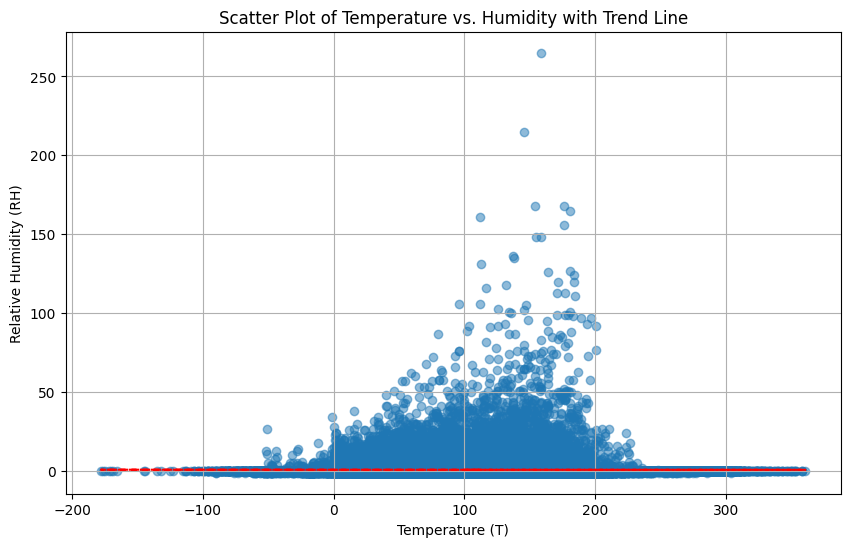

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of two columns (replace with your desired columns)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['T'], weather_df['RH'], alpha=0.5)  # Example: Temperature vs. Humidity

# Add a trend line
# Fit a linear polynomial (degree 1) to the data
z = np.polyfit(weather_df['T'], weather_df['RH'], 1)
p = np.poly1d(z)
plt.plot(weather_df['T'], p(weather_df['T']), "r--") # Plot the trend line

plt.title('Scatter Plot of Temperature vs. Humidity with Trend Line')
plt.xlabel('Temperature (T)')
plt.ylabel('Relative Humidity (RH)')
plt.grid(True)
plt.show()

# Task
Create visualizations to explore the data in the file "/content/Weather data.csv".

## Visualize distributions

### Subtask:
Create histograms or density plots to show the distribution of individual features.


**Reasoning**:
Create histograms for a few representative numeric columns to visualize their distributions.



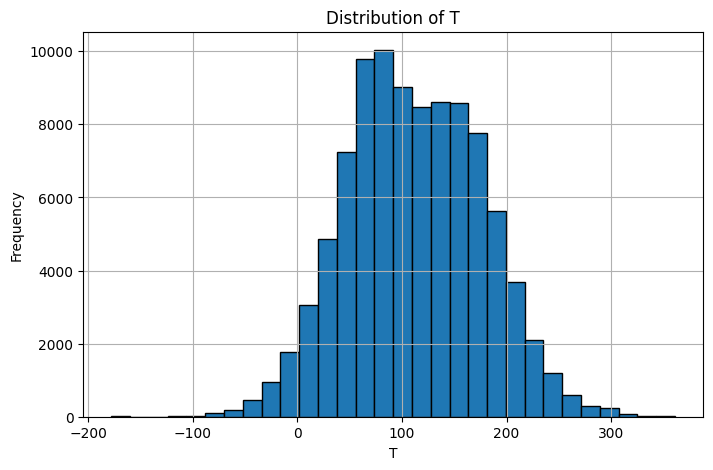

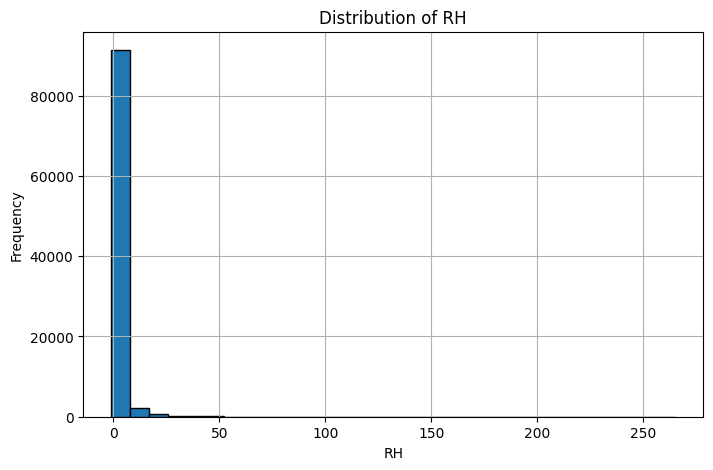

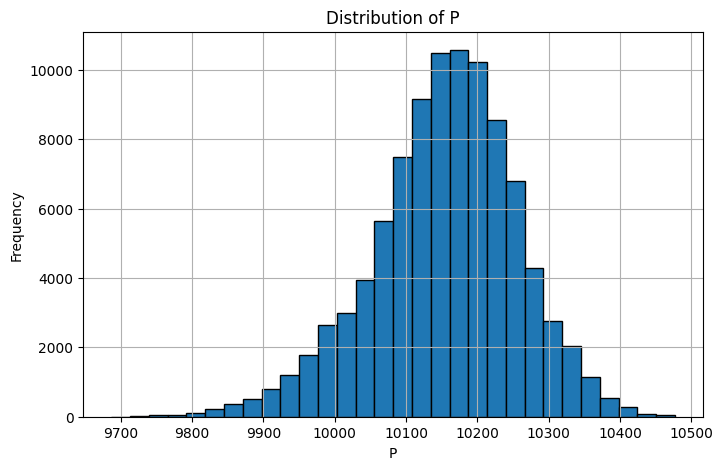

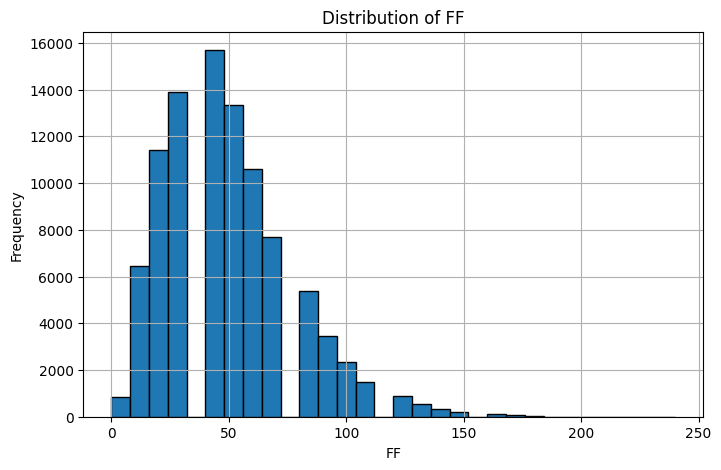

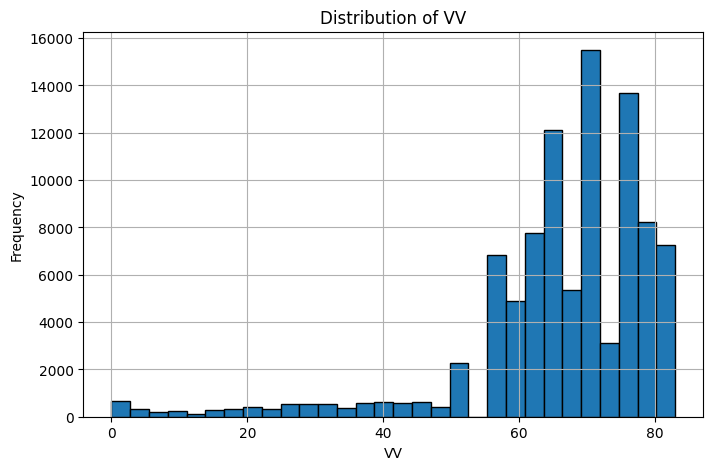

In [ ]:
import matplotlib.pyplot as plt

numeric_cols_to_plot = ['T', 'RH', 'P', 'FF', 'VV']

for col in numeric_cols_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(weather_df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Visualize relationships

### Subtask:
Create scatter plots or pair plots to show the relationships between different features.


**Reasoning**:
Create scatter plots for selected pairs of numeric columns to visualize their relationships.



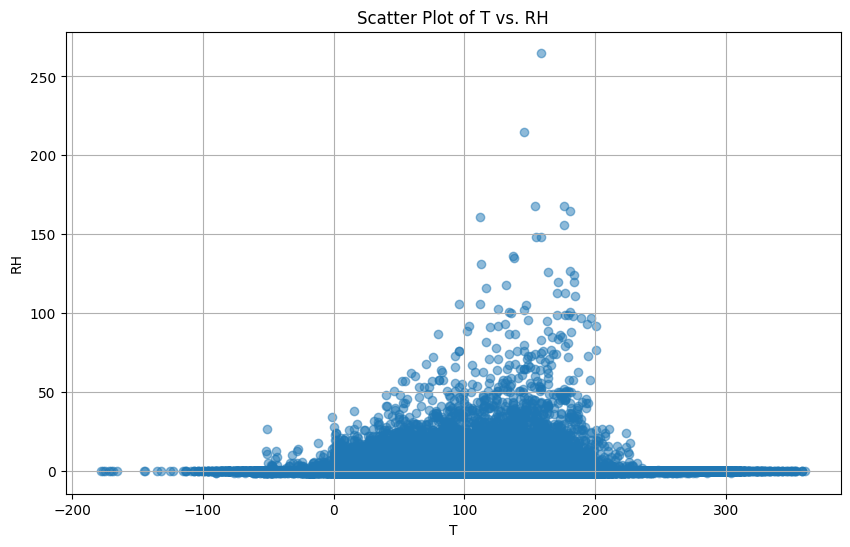

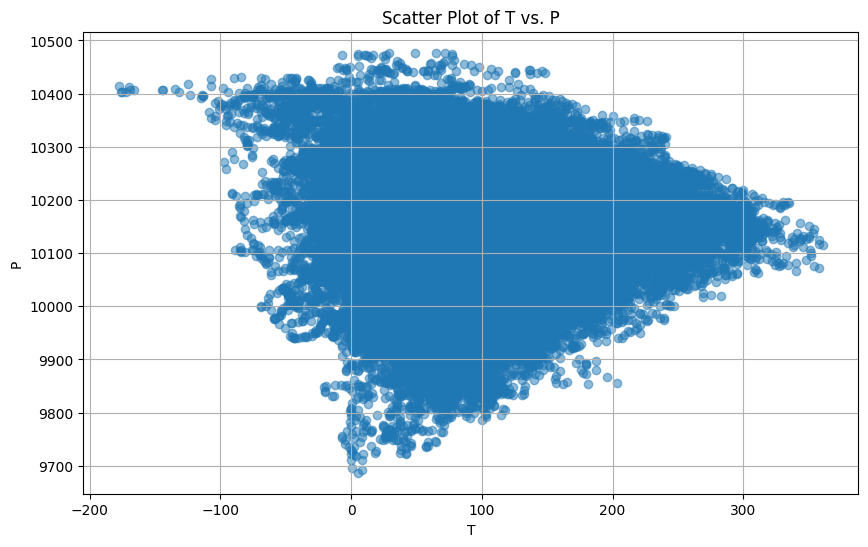

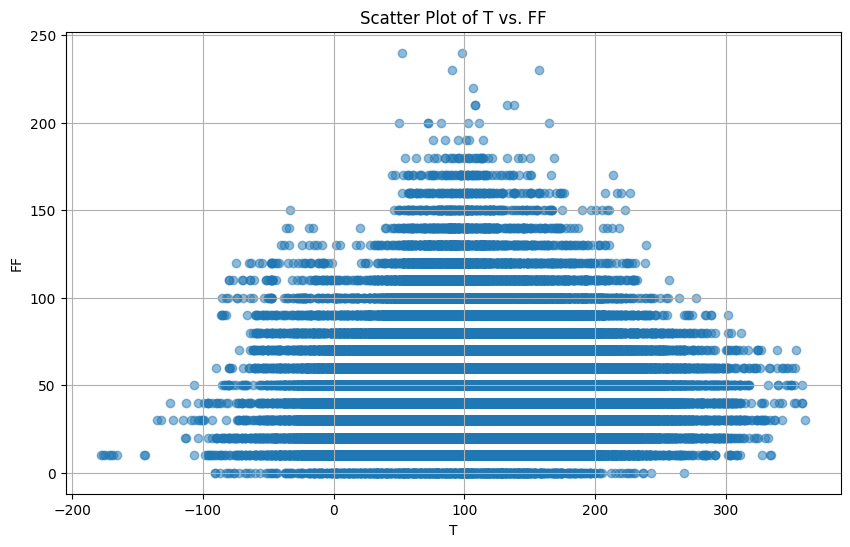

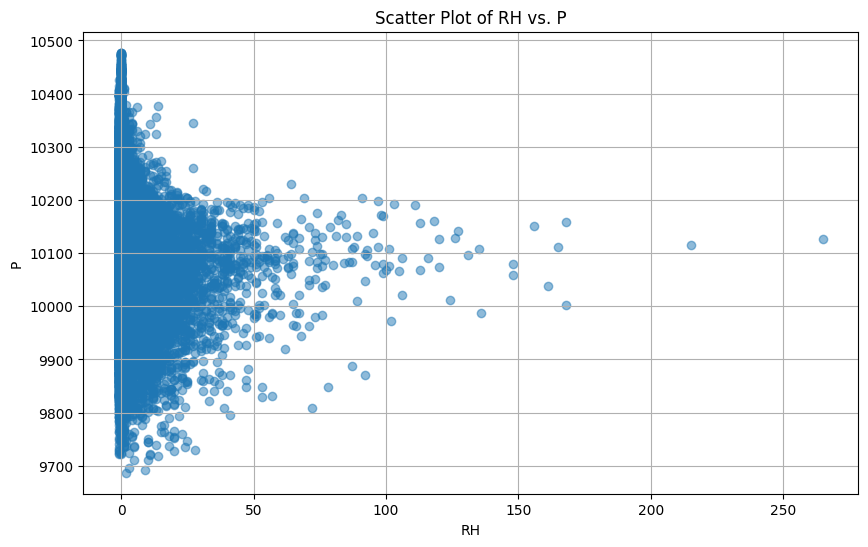

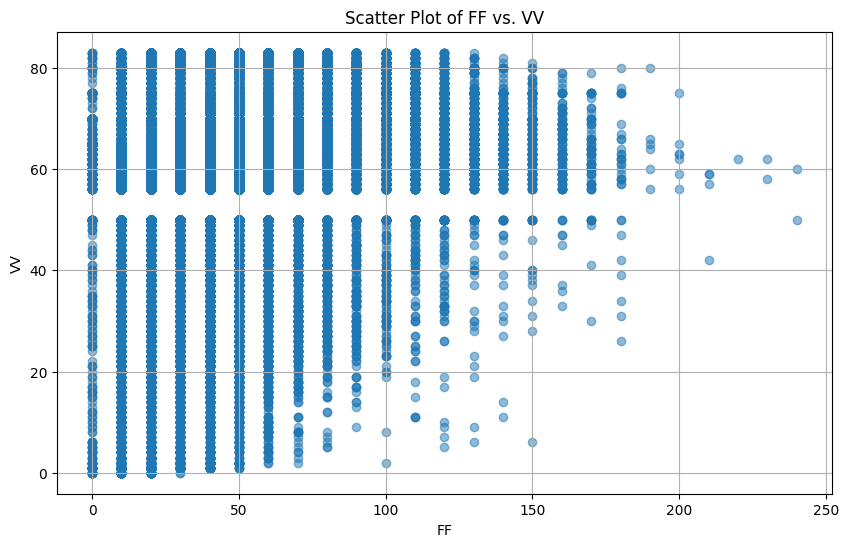

In [ ]:
# Select pairs of numeric columns for scatter plots
scatter_pairs = [('T', 'RH'), ('T', 'P'), ('T', 'FF'), ('RH', 'P'), ('FF', 'VV')]

for col1, col2 in scatter_pairs:
    plt.figure(figsize=(10, 6))
    plt.scatter(weather_df[col1], weather_df[col2], alpha=0.5)
    plt.title(f'Scatter Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

## Visualize time series data

### Subtask:
Create line plots to visualize how features change over time.


**Reasoning**:
Create line plots for selected numeric features over time to visualize their trends.



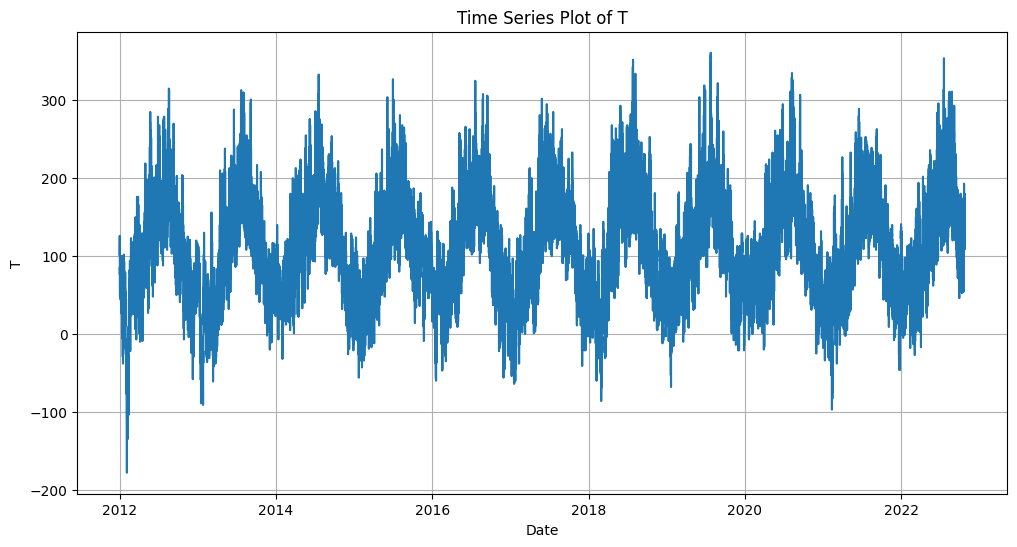

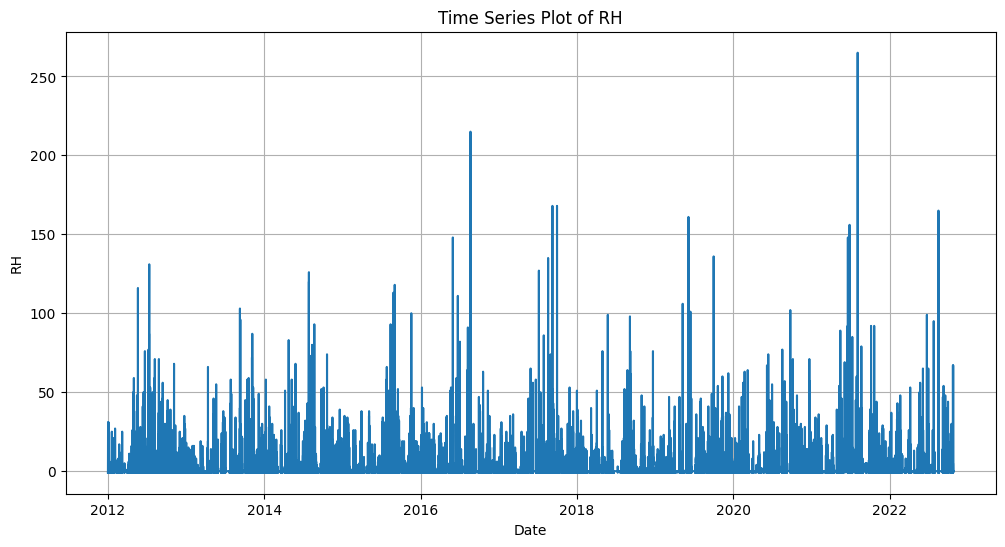

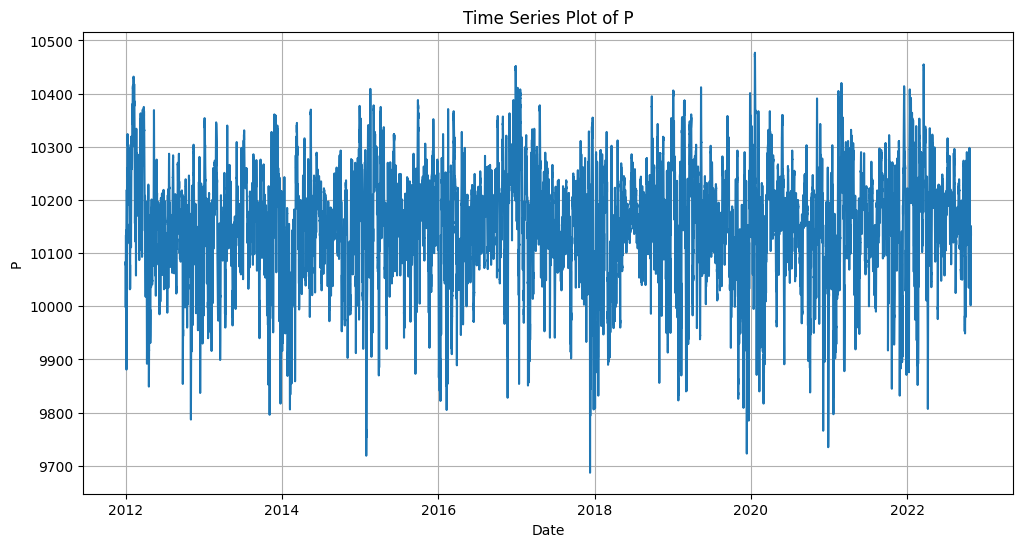

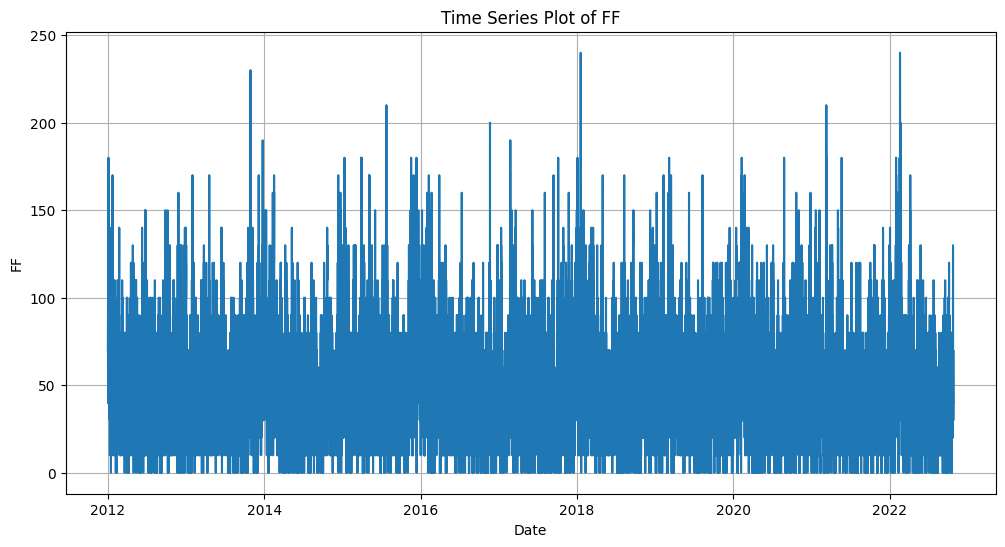

In [ ]:
selected_time_series_cols = ['T', 'RH', 'P', 'FF']

for col in selected_time_series_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(weather_df['YYYYMMDD_H'], weather_df[col])
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## Visualize correlations

### Subtask:
Create a heatmap to show the correlation matrix between numeric features.


**Reasoning**:
Calculate the correlation matrix for the numeric columns and then create a heatmap to visualize it, including annotations of the correlation values and a title, as requested in the instructions.



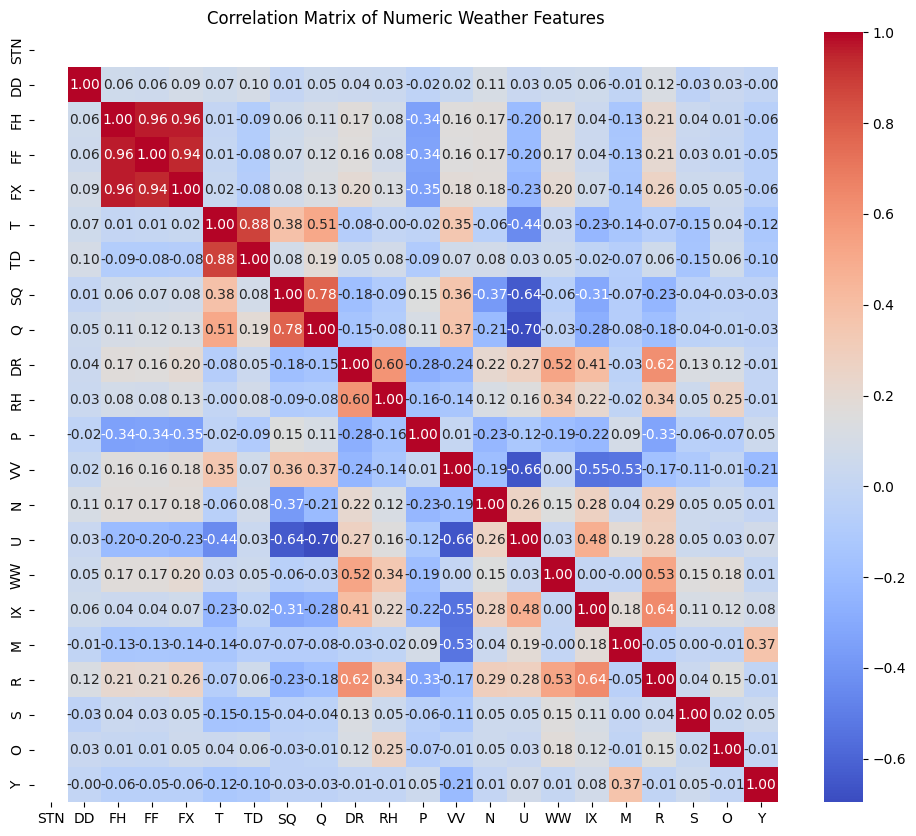

In [ ]:
import seaborn as sns

# Select only numeric columns for correlation matrix calculation
numeric_cols = weather_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = weather_df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Weather Features")
plt.show()

## Summary:

### Data Analysis Key Findings

*   Histograms were successfully generated for Temperature ('T'), Relative Humidity ('RH'), Pressure ('P'), Wind Speed ('FF'), and Visibility ('VV'), showing the distribution of each feature.
*   Scatter plots were created to visualize the relationships between pairs of features: ('T', 'RH'), ('T', 'P'), ('T', 'FF'), ('RH', 'P'), and ('FF', 'VV').
*   Line plots were generated for Temperature ('T'), Relative Humidity ('RH'), Pressure ('P'), and Wind Speed ('FF') to show how these features change over time.
*   A heatmap of the correlation matrix for all numeric features was successfully created, showing the correlation coefficients between pairs of variables.

### Insights or Next Steps

*   Analyze the generated visualizations to identify potential relationships, trends, and patterns in the weather data.
*   Based on the findings, consider performing more in-depth statistical analysis or building predictive models if relevant to the overall project goal.
